# Modules

In [10]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Shears

In [2]:
spectre = pd.read_csv("data/10uW_notsheared.csv", skiprows = 2)

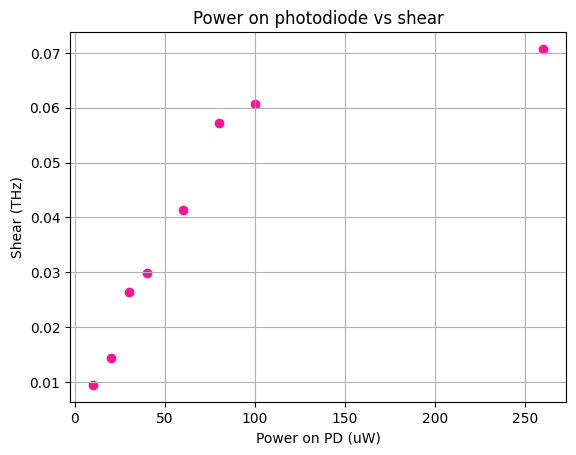

In [3]:
voltages = [10, 20, 30, 40, 60, 80, 100, 260]

shears = []

for voltage in voltages:

    shear = sa.find_shear("data/{}uW_notsheared.csv".format(voltage), "data/{}uW_sheared.csv".format(voltage))
    shears.append(shear)

plt.scatter(voltages, shears, color = "deeppink")
plt.grid()
plt.xlabel("Power on PD (uW)")
plt.ylabel("Shear (THz)")
plt.title("Power on photodiode vs shear")
plt.savefig("PD_vs_shear.jpg")
plt.show()

Starting SPIDER calculations.

1/8
2/8
3/8
4/8
5/8
6/8
7/8
8/8

Yaaay! Everything seems fine!



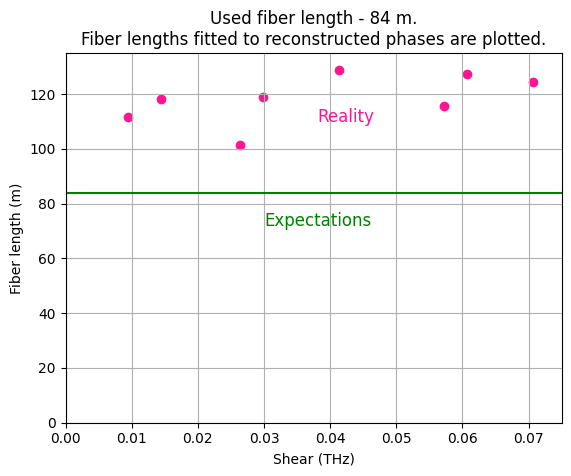

In [26]:
phases = []

print("Starting SPIDER calculations.\n")

for i in range(len(voltages)):
    phase = sa.spider(phase_spectrum = "data/{}uW_pspectrum.csv".format(voltages[i]),
                      temporal_spectrum = "data/{}uW_tspectrum.csv".format(voltages[i]),
                      shear = shears[i],
                      smoothing_period = 0.065,
                      plot_phase = False,
                      plot_steps = False,
                      what_to_return = "phase"
                      )[1]
    phases.append(phase)
    print("{}/{}".format(i+1, len(voltages)))

print("\nYaaay! Everything seems fine!\n")

fibers = []

for i in range(len(voltages)):
    fibers.append(sa.fit_fiber_length(phases[i], plot = False))

plt.scatter(shears, fibers, color = "deeppink")
plt.axhline(y = 84, color = "green")
plt.text(x = 0.03, y = 72, s = "Expectations", color = "green", size = "large")
plt.text(x = 0.038, y = 110, s = "Reality", color = "deeppink", size = "large")
plt.grid()
plt.title("Used fiber length - 84 m.\nFiber lengths fitted to reconstructed phases are plotted.")
plt.ylim([0, 135])
plt.xlim([0, 0.075])
plt.xlabel("Shear (THz)")
plt.ylabel("Fiber length (m)")
plt.savefig("best_fit_fiber.jpg")
plt.show()